In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("superstore_sales.csv")
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [5]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [9]:
df['Postal Code'] = df['Postal Code'].fillna('Unknown')


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)


In [17]:
df[['Order Date', 'Ship Date']].head()



,Order Date,Ship Date
0,2017-11-08,2017-11-11
1,2017-11-08,2017-11-11
2,2017-06-12,2017-06-16
3,2016-10-11,2016-10-18
4,2016-10-11,2016-10-18


In [18]:
df.dtypes



Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [21]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Year'] = df['Order Date'].dt.year

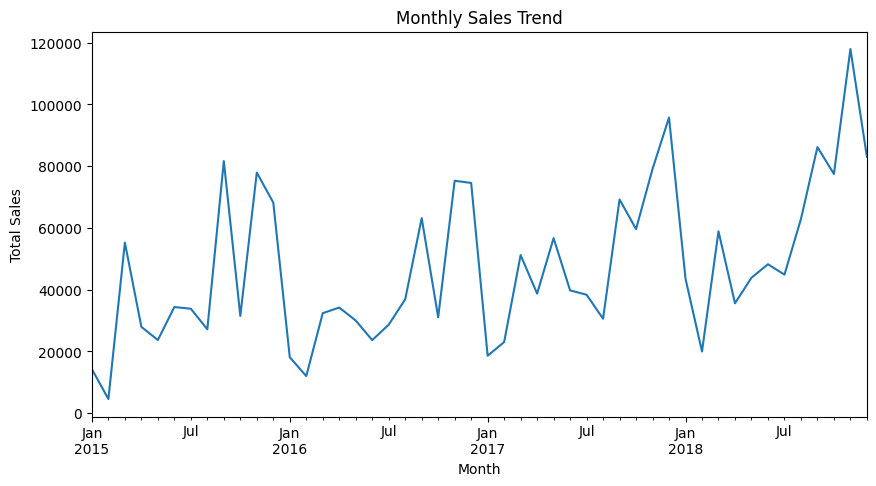

In [22]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
#REVENUE KPIs
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()
avg_order_value = total_sales / total_orders

total_sales, total_orders, total_customers, avg_order_value


(np.float64(2261536.7827), 4922, 793, np.float64(459.4751691791954))

• The business generated total revenue of X across Y orders.
• Average order value reflects customer purchasing behavior.

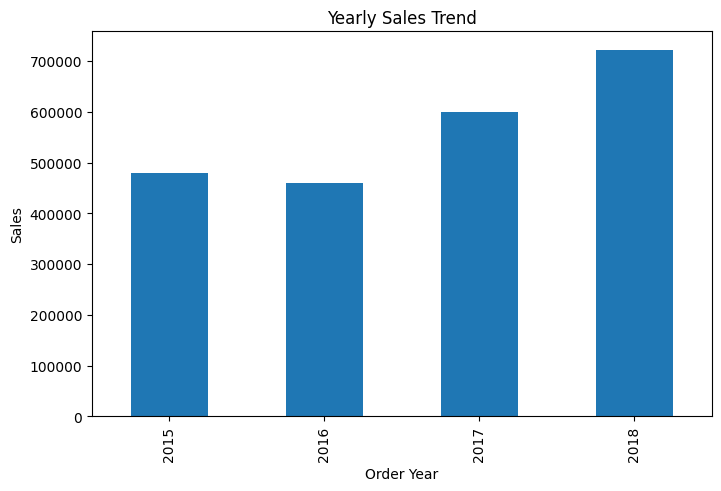

In [ ]:
#SALES GROWTH (YEAR-OVER-YEAR)
yearly_sales = df.groupby('Order Year')['Sales'].sum()

plt.figure(figsize=(8,5))
yearly_sales.plot(kind='bar')
plt.title('Yearly Sales Trend')
plt.ylabel('Sales')
plt.show()


Sales show a clear growth trend over the years, indicating business expansion.


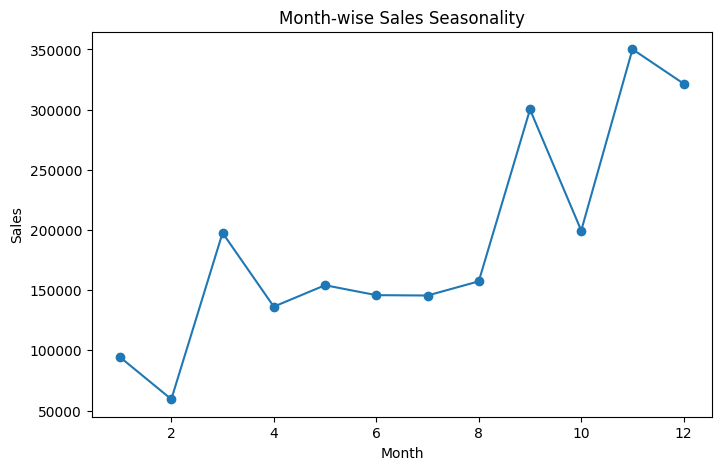

In [ ]:
#Month wise SEASONALITY ANALYSIS
df['Month'] = df['Order Date'].dt.month
month_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(8,5))
month_sales.plot(kind='line', marker='o')
plt.title('Month-wise Sales Seasonality')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Certain months consistently show higher sales, highlighting seasonal demand patterns.


In [33]:

product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

cumulative_sales = product_sales.cumsum() / product_sales.sum()

pareto_df = pd.DataFrame({
    'Sales': product_sales,
    'Cumulative %': cumulative_sales
})

pareto_df.head(10) 


,Sales,Cumulative %
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.824,0.027238
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,0.039377
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,0.049388
HON 5400 Series Task Chairs for Big and Tall,21870.576,0.059058
GBC DocuBind TL300 Electric Binding System,19823.479,0.067824
GBC Ibimaster 500 Manual ProClick Binding System,19024.500,0.076236
Hewlett Packard LaserJet 3310 Copier,18839.686,0.084566
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,0.092691
GBC DocuBind P400 Electric Binding System,17965.068,0.100635


Approximately 20% of products contribute to nearly 80% of total revenue.


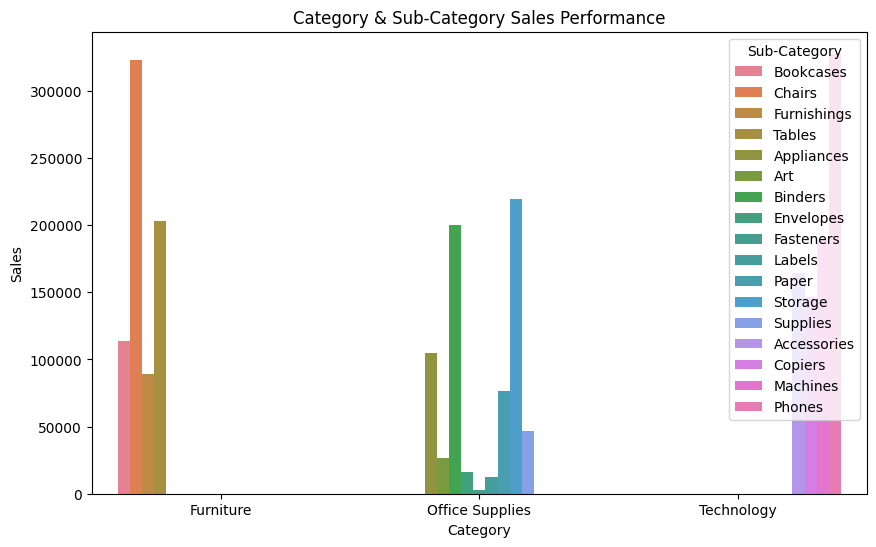

In [27]:
category_sub_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=category_sub_sales, x='Category', y='Sales', hue='Sub-Category')
plt.title('Category & Sub-Category Sales Performance')
plt.show()


In [ ]:
region_sales = df.groupby('Region')['Sales'].sum()
region_pct = (region_sales / region_sales.sum()) * 100

region_summary = pd.DataFrame({
    'Sales': region_sales,
    'Contribution %': region_pct
})

region_summary


,Sales,Contribution %
Region,,
Central,492646.9132,21.783723
East,669518.7260,29.604591
South,389151.4590,17.207390
West,710219.6845,31.404295


West and East regions contribute the majority of overall revenue.


In [29]:
customer_orders = df.groupby('Customer ID')['Order ID'].nunique()

repeat_customers = (customer_orders > 1).sum()
repeat_customers


np.int64(780)

In [36]:
customer_spend = df.groupby('Customer ID')['Sales'].sum()

customer_spend.describe()


count      793.000000
mean      2851.874884
std       2620.668723
min          4.833000
25%       1081.466000
50%       2215.002000
75%       3670.258000
max      25043.050000
Name: Sales, dtype: float64

Recommendations:
• Focus inventory and marketing on top-performing products.
• Expand operations in high-performing regions.
• Target high-value repeat customers with loyalty programs.
• Prepare for seasonal demand spikes using historical trends.


In [31]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Month', 'Order Year', 'Month'],
      dtype='object')